In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

In [4]:
from Bio.Seq import Seq
from Bio import SeqIO
import Bio.Seq as s
import Bio
data= Seq("AGGGAGTTCTCTAGA")
print(data)
print(dir(Bio.Seq))
print(s.CodonTable)

AGGGAGTTCTCTAGA
['ABC', 'BiopythonWarning', 'CodonTable', 'IUPACData', 'MutableSeq', 'Optional', 'Seq', 'SequenceDataAbstractBaseClass', 'UndefinedSequenceError', 'Union', '_PartiallyDefinedSequenceData', '_SeqAbstractBaseClass', '_UndefinedSequenceData', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_dna_complement_table', '_maketrans', '_rna_complement_table', '_test', '_translate_str', 'abstractmethod', 'back_transcribe', 'collections', 'complement', 'complement_rna', 'numbers', 'overload', 'reverse_complement', 'reverse_complement_rna', 'transcribe', 'translate', 'warnings']
<module 'Bio.Data.CodonTable' from 'c:\\Users\\Neermita Bhattachary\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\Bio\\Data\\CodonTable.py'>


## Basic DNA manipulations

In [3]:
## DNA methods

dna= s.Seq("attcgcgcgtatatc")
print(dna.transcribe())
print(dna.translate())
print(dna.reverse_complement())
print(dna.reverse_complement_rna())
print(dna.find("tt"))
print(dna.back_transcribe())
print(dna.count("cgc"))
print(dna.count_overlap("cgc"))
spacer=s.Seq(' ')
spr=spacer.join("actg")
print(spr)
print(dna.replace('a', 'm'))
dna2=Bio.Seq.MutableSeq('a-tt--g-c-t-ac-tg')
print(dna2)

auucgcgcguauauc
IRAYI
gatatacgcgcgaat
gauauacgcgcgaau
1
attcgcgcgtatatc
1
2
a c t g
mttcgcgcgtmtmtc
a-tt--g-c-t-ac-tg


## FASTA files manipulations

In [5]:
## FASTA Files
from Bio import Entrez
Entrez.email = "nemowbio@gmail.com"
handle = Entrez.efetch(db="nucleotide", id="DQ137224", rettype="gb", retmode="text")
record = SeqIO.read(handle, "genbank")
print(record)

ID: DQ137224.1
Name: DQ137224
Description: Megadyptes antipodes voucher JD64A cytochrome b (cytb) gene, partial cds; mitochondrial
Number of features: 3
/molecule_type=DNA
/topology=linear
/data_file_division=VRT
/date=26-JUL-2016
/accessions=['DQ137224']
/sequence_version=1
/keywords=['']
/source=mitochondrion Megadyptes antipodes (Yellow-eyed penguin)
/organism=Megadyptes antipodes
/taxonomy=['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Archelosauria', 'Archosauria', 'Dinosauria', 'Saurischia', 'Theropoda', 'Coelurosauria', 'Aves', 'Neognathae', 'Neoaves', 'Aequornithes', 'Sphenisciformes', 'Spheniscidae', 'Megadyptes']
/references=[Reference(title='Multiple gene evidence for expansion of extant penguins out of Antarctica due to global cooling', ...), Reference(title='Direct Submission', ...)]
Seq('ACACAAATTCTAACTGGCCTCCTACTGGCCGCCCACTACACTGCAGACACAACC...AGC')


## COVID 19 Genome Analysis

In [44]:
from Bio import Entrez, SeqIO, SeqFeature
def fetch(ids):
    Entrez.email="nemowbio@gmail.com"
    handle= Entrez.efetch(db="nucleotide", id=ids, rettype="gb", retmode="text")
    record= list(SeqIO.parse(handle, 'genbank'))
    handle.close()
    return record

In [45]:
record1=fetch("NC_045512.2")

In [46]:
record2=fetch("MN908947")

In [47]:
covid_seq1= record1[0].seq

In [48]:
covid_seq1

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [50]:
covid_seq2= record2[0].seq

In [51]:
covid_seq2

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [52]:
covid_seq2==covid_seq1

True

In [54]:
record1[0].id

'NC_045512.2'

In [56]:
record1[0].features

[SeqFeature(SimpleLocation(ExactPosition(0), ExactPosition(29903), strand=1), type='source', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(0), ExactPosition(265), strand=1), type="5'UTR"),
 SeqFeature(SimpleLocation(ExactPosition(265), ExactPosition(21555), strand=1), type='gene', qualifiers=...),
 SeqFeature(CompoundLocation([SimpleLocation(ExactPosition(265), ExactPosition(13468), strand=1), SimpleLocation(ExactPosition(13467), ExactPosition(21555), strand=1)], 'join'), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(265), ExactPosition(805), strand=1), type='mat_peptide', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(805), ExactPosition(2719), strand=1), type='mat_peptide', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(2719), ExactPosition(8554), strand=1), type='mat_peptide', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(8554), ExactPosition(10054), strand=1), type='mat_peptide', qualifiers=...),
 SeqFeature(Simp

### Description

In [14]:
record1[0].description

'Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome'

###

### Length of covid sequence

In [15]:
print(f"Length of sequence is: {len(covid_seq1)}")

Length of sequence is: 29903


### Molecular Weight of COVID-19

In [16]:
from Bio.SeqUtils import molecular_weight
molecular_weight(covid_seq1)

9241219.214399999

### Stability of COVID-19 through GC content

In [17]:
from Bio.SeqUtils import GC123
GC123(covid_seq1)

(37.97277865097148, 34.71107544141252, 43.23836276083467, 35.968696699107056)

### Count of Nucleotides

In [18]:
print(covid_seq1.count("A"))
print(covid_seq1.count("C"))
print(covid_seq1.count("G"))
print(covid_seq1.count("T"))

8954
5492
5863
9594


In [19]:
covid_seq1.count("G")

5863

In [20]:
covid_seq1.count("C")

5492

In [21]:
covid_seq1.count("T")

9594

### Transcription

In [22]:
covid_mrna= covid_seq1.transcribe()

In [23]:
covid_mrna

Seq('AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGU...AAA')

### Translation

In [24]:
covid_aa= covid_mrna.translate()

c:\Users\Neermita Bhattachary\AppData\Local\Programs\Python\Python312\Lib\site-packages\Bio\Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [25]:
covid_aa

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [26]:
from collections import Counter
amino_acids= Counter(covid_aa)

In [27]:
amino_acids

Counter({'L': 886,
         'S': 810,
         '*': 774,
         'T': 679,
         'C': 635,
         'F': 593,
         'R': 558,
         'V': 548,
         'Y': 505,
         'N': 472,
         'I': 436,
         'K': 413,
         'G': 394,
         'A': 375,
         'H': 332,
         'Q': 325,
         'P': 292,
         'D': 290,
         'E': 270,
         'W': 263,
         'M': 117})

In [28]:
del amino_acids['*']

Text(0, 0.5, 'Frequency')

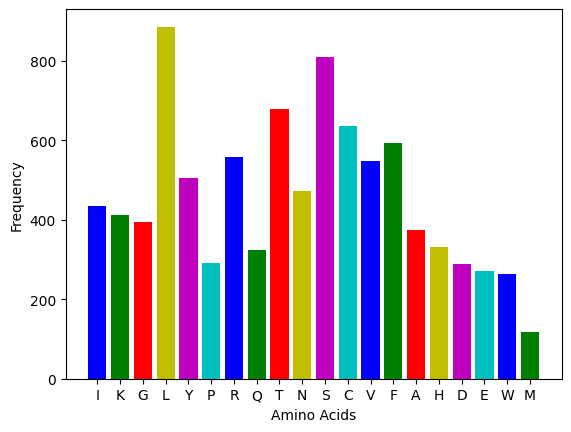

In [29]:
plt.bar(amino_acids.keys(), amino_acids.values(), color=['b', 'g', 'r', 'y', 'm', 'c'])
plt.xlabel("Amino Acids")
plt.ylabel("Frequency")

In [30]:
print(f"Number of amino acids in Covid 19 with * : {sum(amino_acids.values())}")

Number of amino acids in Covid 19 with * : 9193


In [31]:
covid_aa

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [32]:
actual_covid_aa=covid_aa.split('*')

In [33]:
actual_covid_aa[:5]

[Seq('IKGLYLPR'),
 Seq('QTNQLSISCRSVL'),
 Seq('TNFKICVAVTRLHA'),
 Seq('CTHAV'),
 Seq('LITNYCR')]

In [34]:
len(actual_covid_aa)

775

In [35]:
proteins= actual_covid_aa.copy()

Not all aa sequences are proteins. Sequences with more than 20 amino acids code for functional proteins. Shorter aas code for oligopeptides.

In [36]:

for protein in actual_covid_aa:
    if len(protein)<20:
        proteins.remove(protein)

In [37]:
len(proteins)

80

In [38]:
longest_protein= sorted(proteins, key=len)

In [39]:
longest_protein[-1]

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

In [40]:
len(longest_protein[-1])

2701

In [87]:
with open("longest_protein_seq.fasta", "w") as file:
    file.write(f">covid protein\n{longest_protein[-1]}")

### Finally, Genome Annotation!

In [41]:
from Bio.SeqFeature import SeqFeature, FeatureLocation
from Bio.Graphics import GenomeDiagram
from Bio.Seq import translate
from Bio import motifs
from reportlab.lib import colors
import matplotlib.pyplot as plt

In [89]:
pip install ReportLab

   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   -------------------------- ------------- 1.3/1.9 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 10.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [58]:
from Bio.Graphics import GenomeDiagram
from reportlab.lib import colors

def annotate_genes(record):
    gd_diagram = GenomeDiagram.Diagram("SARS-CoV-2 Genome")
    gd_track = gd_diagram.new_track(1, name="Annotated Genes")
    gd_feature_set = gd_track.new_set()
    
    # Add features from GenBank file
    for feature in record.features:
        if feature.type == "gene":
            color = colors.pink if "gene" in feature.qualifiers else colors.lightgrey
            gd_feature_set.add_feature(feature, color=color, label=True, label_size=8)
    
    # Render diagram
    gd_diagram.draw(format="circular", circular=True, pagesize=(400, 400), start=0, end=len(record.seq))
    gd_diagram.write("covid_genome_diagram.pdf", "PDF")
    print("Genome diagram saved as 'covid_genome_diagram.pdf'.")

annotate_genes(record1[0])

Genome diagram saved as 'covid_genome_diagram.pdf'.


In [59]:
record1[0].features

[SeqFeature(SimpleLocation(ExactPosition(0), ExactPosition(29903), strand=1), type='source', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(0), ExactPosition(265), strand=1), type="5'UTR"),
 SeqFeature(SimpleLocation(ExactPosition(265), ExactPosition(21555), strand=1), type='gene', qualifiers=...),
 SeqFeature(CompoundLocation([SimpleLocation(ExactPosition(265), ExactPosition(13468), strand=1), SimpleLocation(ExactPosition(13467), ExactPosition(21555), strand=1)], 'join'), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(265), ExactPosition(805), strand=1), type='mat_peptide', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(805), ExactPosition(2719), strand=1), type='mat_peptide', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(2719), ExactPosition(8554), strand=1), type='mat_peptide', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(8554), ExactPosition(10054), strand=1), type='mat_peptide', qualifiers=...),
 SeqFeature(Simp

In [ ]:
def annotate_genome(record, orfs):
    gd_diagram = GenomeDiagram.Diagram("SARS-CoV-2 Genome with ORFs and Functional Regions")
    gd_track = gd_diagram.new_track(1, name="Annotations")
    gd_feature_set = gd_track.new_set()
    for feature in record.features:
        if feature.type == "gene":
            color = colors.blue
            gd_feature_set.add_feature(feature, color=color, label=True, label_size=8)
    
    # Add ORF annotations
    for orf in orfs:
        feature = SeqFeature(orf, type="ORF")
        gd_feature_set.add_feature(feature, color=colors.orange, label=False)
    
    # Render diagram
    gd_diagram.draw(format="circular", circular=True, pagesize=(400, 400), start=0, end=len(record.seq))
    gd_diagram.write("covid_genome_with_orfs.pdf", "PDF")
    print("Genome diagram with ORFs and functional regions saved as 'covid_genome_with_orfs.pdf'.")
